In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [4]:
from matplotlib import pyplot as plt
import numpy as np

class PlotLossAccuracy(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
        self.per_batch_accuracy = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
        self.per_batch_accuracy.append(logs.get("accuracy"))

    def on_epoch_end(self, epoch, logs):
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.plot(range(len(self.per_batch_accuracy)), self.per_batch_accuracy,
                 label="Training accuracy for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        self.per_batch_losses = []   
        self.per_batch_accuracy = []       
        plt.legend()
        plt.show()
        
class CustomizedEarlyStopping(keras.callbacks.Callback):
    def __init__(self, patience=0):
        super().__init__()
        self.patience = patience
        self.stopped_epoch = 0
        self.best_weights = None
    
    def on_train_begin(self, logs):
        self.old_val_loss = np.Inf
        self.continued_epoch=0
    
    def on_epoch_end(self, epoch, logs):
        val_loss = logs.get("val_loss")
        if val_loss > self.old_val_loss:
            self.continued_epoch+=1
            if self.continued_epoch >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
        else:
            self.best_weights = self.model.get_weights()
            self.continued_epoch=0
        self.old_val_loss = val_loss
    
    def on_train_end(self, logs):
        if self.stopped_epoch > 0:
            print("Early stopping epoch: ", self.stopped_epoch + 1)

Epoch 1/8
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2951 - accuracy: 0.9126 - val_loss: 0.1437 - val_accuracy: 0.9585


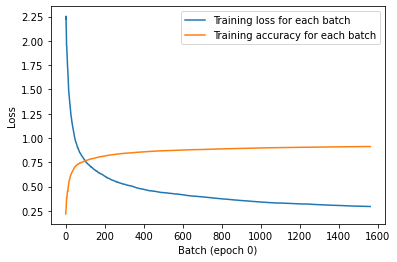

Epoch 2/8
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1636 - accuracy: 0.9543 - val_loss: 0.1272 - val_accuracy: 0.9666


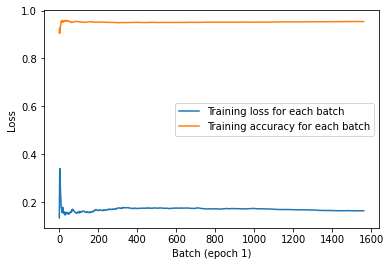

Epoch 3/8
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1364 - accuracy: 0.9628 - val_loss: 0.1077 - val_accuracy: 0.9722


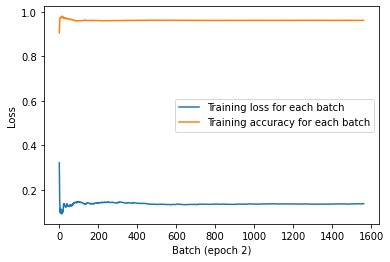

Epoch 4/8
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1237 - accuracy: 0.9671 - val_loss: 0.1084 - val_accuracy: 0.9728


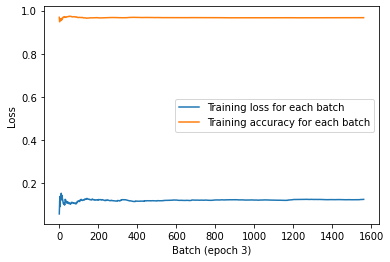

Early stopping epoch:  4


In [17]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels,
          epochs=8,
          callbacks=[PlotLossAccuracy(), CustomizedEarlyStopping()],
          validation_data=(val_images, val_labels))

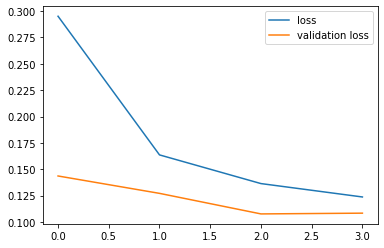

In [19]:
plt.plot(range(4), history.history['loss'], label='loss')
plt.plot(range(4), history.history['val_loss'], label='validation loss')
         
plt.legend()
plt.show()